In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/allHandData_2911.csv')
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/Combined_PupilDiameter.csv')
df = pd.DataFrame(data2load)
#df = pd.DataFrame(data2load).drop(['Timepoint','ID'], axis=1)
df


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dhewitt/Data/pps/Exports/Combined_PupilDiameter.csv'

In [156]:
df=df.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})


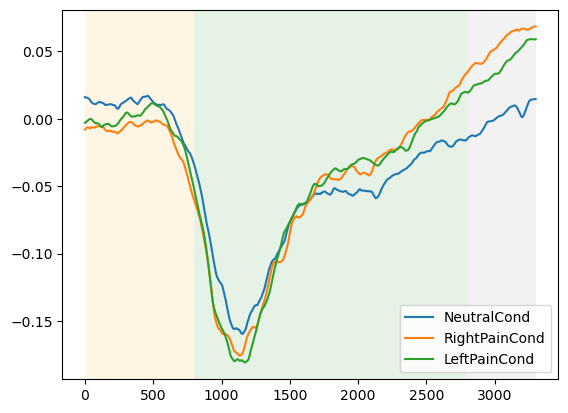

In [157]:
avdf = df.groupby(['Timepoint']).mean().drop('ID',axis=1)
# Plotting the averages for the 'conditioning' blocks
plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.plot(avdf['CM'],label="NeutralCond")
plt.plot(avdf['CR'],label="RightPainCond")
plt.plot(avdf['CL'],label='LeftPainCond')

plt.legend(loc='lower right')
plt.show()

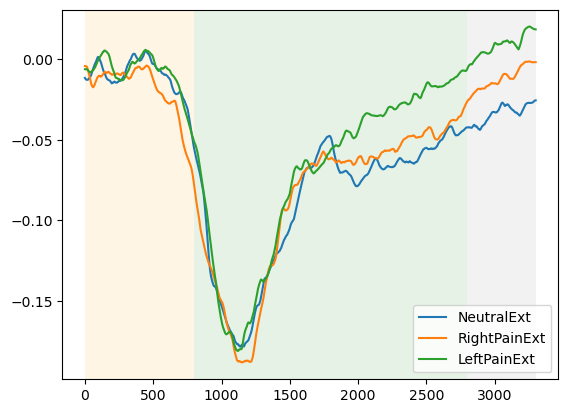

In [158]:
# Plotting the averages for the 'extinction' blocks

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.plot(avdf['EM'],label="NeutralExt")
plt.plot(avdf['ER'],label="RightPainExt")
plt.plot(avdf['EL'],label='LeftPainExt') #looks weird - check??

plt.legend(loc='lower right')
plt.show()

In [159]:
cuedf = df.loc[df['Timepoint'].between(0,799)].groupby('ID').mean()
cuedf = cuedf.add_suffix('_cue').drop('Timepoint_cue',axis=1)
cuedf['CP_cue'] = cuedf[['CL_cue', 'CR_cue']].mean(axis=1)
cuedf['EP_cue'] = cuedf[['EL_cue', 'ER_cue']].mean(axis=1)

waitdf = df.loc[df['Timepoint'].between(800,2799)].groupby('ID').mean()
waitdf = waitdf.add_suffix('_wait').drop('Timepoint_wait',axis=1)
waitdf['CP_wait'] = waitdf[['CL_wait', 'CR_wait']].mean(axis=1)
waitdf['EP_wait'] = waitdf[['EL_wait', 'ER_wait']].mean(axis=1)

rockdf = df.loc[df['Timepoint'].between(2800,3299)].groupby('ID').mean()
rockdf = rockdf.add_suffix('_rock').drop('Timepoint_rock',axis=1)
rockdf['CP_rock'] = rockdf[['CL_rock', 'CR_rock']].mean(axis=1)
rockdf['EP_rock'] = rockdf[['EL_rock', 'ER_rock']].mean(axis=1)

In [160]:
grandavdf = pd.concat([cuedf, waitdf,rockdf],axis=1)
grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter.csv')
#grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDir.csv')

# Making the long format export

In [161]:
# Construct the list of columns to drop
columns_to_drop = ['CL_cue', 'CR_cue', 'EL_cue', 'ER_cue', 'CL_wait', 'CR_wait', 'EL_wait', 'ER_wait', 'CL_rock', 'CR_rock', 'EL_rock', 'ER_rock']

# Drop the specified columns
grandavdfL = grandavdf.drop(columns_to_drop, axis=1)

# Print the column names after dropping
print("Column Names After Drop:")
print(grandavdfL.columns)


Column Names After Drop:
Index(['CM_cue', 'EM_cue', 'CP_cue', 'EP_cue', 'CM_wait', 'EM_wait', 'CP_wait',
       'EP_wait', 'CM_rock', 'EM_rock', 'CP_rock', 'EP_rock'],
      dtype='object')


In [162]:
grandavdfL = grandavdfL.melt(ignore_index=False).reset_index()
grandavdfL.rename({'variable':'Condition', 'value':'Diameter'}, axis=1, inplace=True)

grandavdfL[['Condition', 'Phase']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))

grandavdfL

,ID,Condition,Diameter,Phase
0,2,CM,0.006961,cue
1,3,CM,0.063896,cue
2,4,CM,0.006506,cue
3,5,CM,0.041729,cue
4,6,CM,-0.001027,cue
...,...,...,...,...
307,26,EP,0.001013,rock
308,27,EP,-0.012240,rock
309,28,EP,0.017761,rock
310,29,EP,-0.084902,rock


In [163]:

grandavdfL = grandavdfL.replace({'CM':'ConditioningNeutral', 'EM':'ExtinctionNeutral', 'CP':'ConditioningPain', 'EP':'ExtinctionPain'})
grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterLong.csv', index=False)
#grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_GazeDirLong.csv', index=False)

# Extinction sides data

In [4]:
#data2load = pd.read_csv('/Users/dhewitt/Data/pps/allPupilDataExt.csv')
data2load = pd.read_csv('/Users/dhewitt/Data/pps/Exports/PupilDiameter/Combined_PupilDiameterExt.csv')
dfext = pd.DataFrame(data2load)
dfext=dfext.rename(columns={'Unnamed: 0':'Timepoint', 'Participant':'ID'})

data2load = pd.read_csv('/Users/dhewitt/Data/pps/tonicpainsides.csv')
sidesdf = pd.DataFrame(data2load)
dfext=dfext.join(sidesdf.set_index('ID'), on='ID')
dfext

,Timepoint,EM1,EL1,ER1,EM2,EL2,ER2,ID,B1,B2
0,0,0.008231,0.009280,-0.036151,-0.011588,-0.032587,-0.006322,2,2,1
1,1,0.008160,0.009278,-0.036287,-0.011571,-0.032671,-0.006360,2,2,1
2,2,0.008157,0.009276,-0.036424,-0.011670,-0.032755,-0.006398,2,2,1
3,3,0.008144,0.009274,-0.036561,-0.011770,-0.032839,-0.006463,2,2,1
4,4,0.008131,0.009272,-0.036695,-0.011869,-0.032922,-0.006529,2,2,1
...,...,...,...,...,...,...,...,...,...,...
85795,3295,-0.316053,-0.162749,0.053078,-0.071267,-0.052282,-0.064727,30,1,2
85796,3296,-0.316091,-0.162749,0.053110,-0.071267,-0.052282,-0.064727,30,1,2
85797,3297,-0.316130,-0.162749,0.053143,-0.071267,-0.052282,-0.064727,30,1,2
85798,3298,-0.316169,-0.162749,0.053175,-0.071267,-0.052282,-0.064727,30,1,2


In [8]:
##if it's not directional

dfext['congruent'] = dfext.loc[dfext['B1'] == 1, ['EL1', 'ER2']].mean(axis=1)
dfext['congruent'].fillna(dfext.loc[dfext['B1'] == 2, ['ER1', 'EL2']].mean(axis=1), inplace=True)
dfext['incongruent'] = dfext.loc[dfext['B1'] == 2, ['EL1', 'ER2']].mean(axis=1)
dfext['incongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['ER1', 'EL2']].mean(axis=1), inplace=True)
dfext['neutral'] = dfext[['EM1','EM2']].mean(axis=1)

dfext.drop(['EL1','ER1','EL2','ER2','B1','B2', 'EM1','EM2'], axis=1, inplace=True)
dfext.reset_index(drop=True, inplace=True)

KeyError: 'B1'

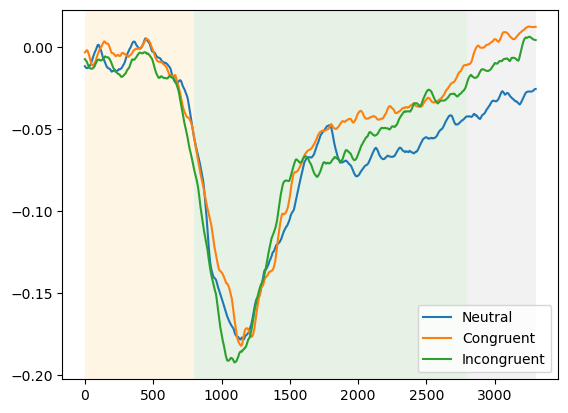

In [9]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

plt.plot(avdfext['neutral'],label='Neutral')
plt.plot(avdfext['congruent'],label="Congruent")
plt.plot(avdfext['incongruent'],label="Incongruent")

#ax = plt.gca()
#ax.set_ylim([-3, 3])

plt.legend(loc='lower right')
plt.show()

In [7]:
##if it's a directional thing

dfext['Lcongruent'] = dfext.loc[dfext['B1'] == 1, ['EL1']].mean(axis=1)
dfext['Lcongruent'].fillna(dfext.loc[dfext['B1'] == 2, ['EL2']].iloc[:,0], inplace=True)
dfext['Rcongruent'] = dfext.loc[dfext['B1'] == 1, ['ER2']]
dfext['Rcongruent'].fillna(dfext.loc[dfext['B1'] == 2, ['ER1']].iloc[:,0], inplace=True)
dfext['Lincongruent'] = dfext.loc[dfext['B1'] == 2, ['EL1']]
dfext['Lincongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['EL2']].iloc[:,0], inplace=True)
dfext['Rincongruent'] = dfext.loc[dfext['B1'] == 2, ['ER2']]
dfext['Rincongruent'].fillna(dfext.loc[dfext['B1'] == 1, ['ER1']].iloc[:,0], inplace=True)

dfext.drop(['EL1','ER1','EL2','ER2','B1','B2', 'EM1','EM2'], axis=1, inplace=True)
dfext.reset_index(drop=True, inplace=True)

KeyError: 'B1'

In [133]:

dfext

,Timepoint,ID,Lcongruent,Rcongruent,Lincongruent,Rincongruent
0,0,2,5.514227,43.924592,44.320240,9.823628
1,1,2,5.423939,43.897817,44.305149,9.793601
2,2,2,5.332700,43.871043,44.290059,9.800210
3,3,2,5.243088,43.844269,44.275780,9.809880
4,4,2,5.153887,43.830387,44.269416,9.817857
...,...,...,...,...,...,...
85795,3295,30,0.884374,8.422852,5.489349,-1.689911
85796,3296,30,0.884374,8.422852,5.489349,-1.689911
85797,3297,30,0.884374,8.422852,5.489349,-1.689911
85798,3298,30,0.329124,5.204519,2.563477,-0.007417


KeyError: 'Lcongruent'

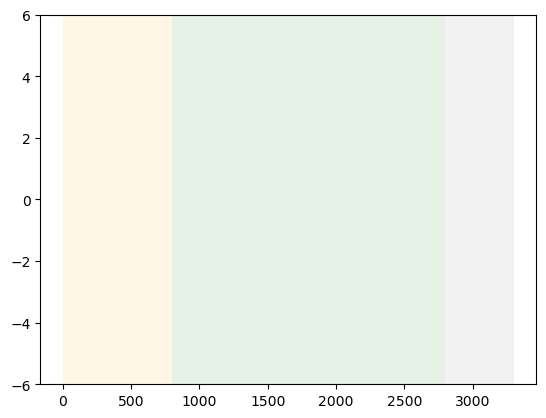

In [168]:
# Plotting the averages for the 'conditioning' blocks
avdfext = dfext.groupby(['Timepoint']).mean().drop('ID',axis=1)

plt.axvspan(0, 800, color='orange', alpha=0.10, lw=0)
plt.axvspan(800, 2800, color='green', alpha=0.10, lw=0)
plt.axvspan(2800, 3300, color='gray', alpha=0.10, lw=0)

ax = plt.gca()
ax.set_ylim([-6, 6])

plt.plot(avdfext['Lcongruent'],label="LCongruent")
plt.plot(avdfext['Rcongruent'],label="RCongruent")
plt.plot(avdfext['Lincongruent'],label="LIncongruent")
plt.plot(avdfext['Rincongruent'],label="RIncongruent")

plt.legend(loc='lower right')
plt.show()

In [169]:
cuedf = dfext.loc[dfext['Timepoint'].between(0,799)].groupby('ID').mean()
cuedf = cuedf.add_suffix('_cue').drop('Timepoint_cue',axis=1)

waitdf = dfext.loc[dfext['Timepoint'].between(800,2799)].groupby('ID').mean()
waitdf = waitdf.add_suffix('_wait').drop('Timepoint_wait',axis=1)

rockdf = dfext.loc[dfext['Timepoint'].between(2800,3299)].groupby('ID').mean()
rockdf = rockdf.add_suffix('_rock').drop('Timepoint_rock',axis=1)

grandavdf = pd.concat([cuedf, waitdf,rockdf],axis=1)

In [170]:
grandavdf

,congruent_cue,incongruent_cue,neutral_cue,congruent_wait,incongruent_wait,neutral_wait,congruent_rock,incongruent_rock,neutral_rock
ID,,,,,,,,,
2,-0.015609,-0.005962,-0.032765,-0.061371,-0.056848,-0.119376,-0.009819,-0.014348,-0.131433
3,-0.021720,0.003954,0.000520,-0.000943,-0.042839,-0.000100,0.061978,0.067315,0.025948
4,0.006122,0.010660,0.076786,-0.035039,-0.050704,0.025056,0.019898,0.021234,0.056576
5,0.002212,0.025509,-0.056389,0.082828,0.023111,-0.018512,0.096948,0.008191,0.089589
6,-0.012321,0.008770,0.019612,-0.043696,-0.114856,-0.071911,0.022942,-0.091516,-0.038346
8,-0.038052,-0.146237,-0.105567,-0.079853,-0.042221,-0.116101,-0.104720,0.024921,0.084351
9,-0.083495,0.012419,0.012424,-0.143456,-0.111232,-0.150207,-0.065852,-0.050701,-0.037811
10,0.022781,-0.022144,-0.018406,-0.052089,-0.036888,-0.086464,-0.026285,-0.020348,-0.037886
11,0.056881,-0.011727,-0.056725,-0.033912,-0.141343,-0.110946,0.055656,-0.016996,-0.114104


In [171]:
## Saving this for later

grandavdf.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameterExt.csv')
#grandavdf.to_csv('/Users/dhewitt/Data/pps/GrandAvExport_GazeDir_Extinctionsides.csv')

# Making it long format

In [172]:
grandavdfL = grandavdf.melt(ignore_index=False)

grandavdfL.rename({'variable':'Condition', 'value':'Diameter'}, axis=1, inplace=True)

grandavdfL[['Condition', 'Phase']] = grandavdfL["Condition"].apply(lambda x: pd.Series(str(x).split("_")))

grandavdfL

In [ ]:
## Saving this for later

#grandavdfL.to_csv('/Users/dhewitt/Data/pps/GrandAvExport_GazeDir_ExtinctionsidesLong.csv')
grandavdfL.to_csv('/Users/dhewitt/Data/pps/Exports/GrandAvExport_PupilDiameter_ExtinctionsidesLong.csv')